# Lab 6
## Feature expansion and regularization in sklearn 
This lab teaches you feature expansion and regularization in sklearn


In [46]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model
from sklearn.model_selection import train_test_split, cross_val_score

## Polynomial expansion 

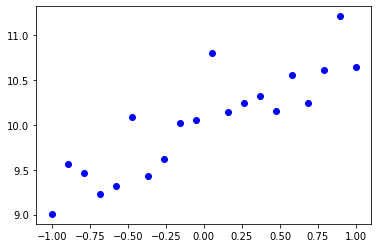

In [47]:
# Let's load a data set and look at it.
D = pd.read_csv('regression_data.csv')
plt.plot(D.x, D.y, 'bo')


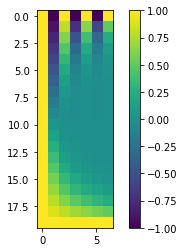

In [48]:
# Build a design matrix with polynomial expansion on X
x = D.x.values
x = x.reshape(-1, 1)
poly = sk.preprocessing.PolynomialFeatures(6)
X = poly.fit_transform(x)
#print(X.shape)
#pd.DataFrame(X).head() 
plt.imshow(X)
plt.colorbar()

(7,)


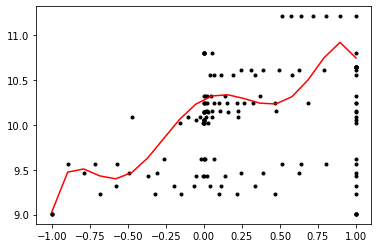

In [49]:
# Now fit a standard linear model to the data and plot prediction 
reg = sk.linear_model.LinearRegression(fit_intercept=False)
reg.fit(X, D.y)
yp = reg.predict(X)
plt.plot(X, D.y, 'k.', x, yp, 'r-')
print(reg.coef_.shape)

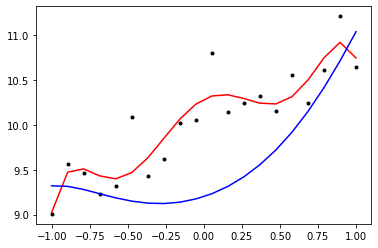

In [50]:
# This seems very wiggly. Could we do better with Ridge regression? 
# Let's regulatrize a lot
ridge = sk.linear_model.Ridge(alpha=1.0, fit_intercept=False)
ridge.fit(X, D.y)
ypp = ridge.predict(X)
plt.plot(x, D.y, 'k.', x, yp, 'r-', x, ypp, 'b-')


### Fix the intercept problem

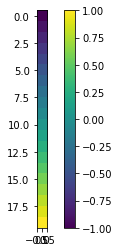

In [51]:
# What happend? 
# The problem is that the Ridge coefficient was also applied to the intercept
# Sometimes this is desired, sometimes not. In this case we want to not to include the intercept 
# into the regressors that should be regularized 
poly = sk.preprocessing.PolynomialFeatures(6, include_bias=0)
X = poly.fit_transform(x)

scaler = sk.preprocessing.StandardScaler(with_mean=True, with_std=True)
X = scaler.fit_transform(X)

plt.imshow(x)
plt.colorbar()

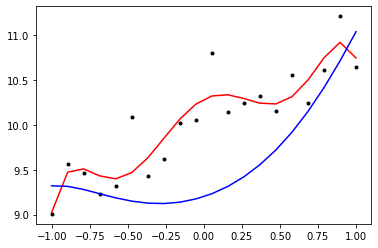

In [52]:
# If we set fit_intercept = True, ridge regression fits the intercept 
ridge = sk.linear_model.Ridge(alpha=5.0, fit_intercept=True)
ridge.fit(X, D.y)
plt.plot(x, D.y, 'k.', x, yp, 'r-', x, ypp, 'b-')

In [53]:
# Also redo the linear regression 
reg = sklearn.linear_model.LinearRegression(fit_intercept=True)
reg.fit(X,D.y)


LinearRegression()

In [54]:
# Now inspect the coefficients: No explicit intercept is fitted - ridge coefficients are smaller 
(reg.coef_, ridge.coef_)


(array([ 0.5259425 , -1.22248473, -0.14851093,  2.98075495,  0.12675624,
        -1.85398615]),
 array([ 0.26264477, -0.03604224,  0.12595432,  0.01336734,  0.06098453,
        -0.0009332 ]))

In [55]:
# Now let's try a lower alpha (i.e. regularization coefficient) 

### How to set the regularization coefficent? 

In [56]:
# So, how should we tune the regularization coefficient? 
# Let's use crossvalidation 
cv_scores = cross_val_score(sk.linear_model.LinearRegression(), X, D.y,cv=5,scoring = 'neg_mean_squared_error')
-cv_scores

array([2.59262227e+02, 2.40636938e-01, 9.21051190e-02, 1.01115077e-01,
       7.09633014e+01])

In [57]:
# Systematically vary the ridge coeficient on a log-scale
lam = np.exp(np.linspace(-4,2,10))
mse = np.zeros(10)

for i in range(lam.size):
    cv_scores = cross_val_score(sk.linear_model.Ridge(alpha=lam[i]), X, D.y,cv=5,scoring = 'neg_mean_squared_error')
    mse[i]=-cv_scores.mean()


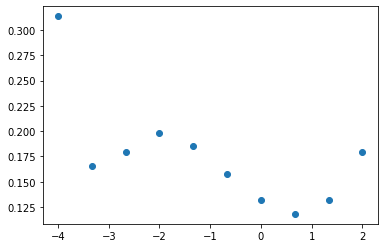

In [58]:
# Determine lowest value 
plt.scatter(np.log(lam),mse)


In [59]:
# So low let's look at the crossvalidation error for the best setting of lambda 



### Lasso 

In [60]:
# Let's do lasso on the same model 



In [61]:
# Let's check the coefficients. What do you notice compared to the ridge? 



### Lasso Path 

In [62]:
# Get a full path for Lasso




